# PRINCIPAL COMPONENT ANALYSIS FOR DIMENSIONALITY REDUCTION
Principal Component Analysis (PCA) is an approach to reduce the dimensionality of a dataset with the goal of preserving as much variance as possible. We will perform a PCA on a synthetic dataset.

**a)** Create a synthetic regression dataset with ten toy examples. Use the respective scikit-learn function for this ([make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)). The data should be 2D with a single scalar as the target (so 3D for the complete dataset). Center the data by subtracting the mean value from all data points.

**b)** Visualize the data with matplotlib in a 3D plot where the data points are on the X- and Y-axis and the target values are on the Z-axis.

**c)** Perform a linear regression with the data and visualize the linear model together with the data in a 3D plot. You can simply add the linear model to the visualization from part b) of this exercise.

**d)** Compute the Principal Components (PCs) of the data using the Singular Value Decomposition (SVD) of numpy. Project all data points onto the prior computed axis resulting from SVD.

**e)** Visualize the resulting data and the respective targets in a 2D scatter plot. Compare it with the visualization of the data transformed by the PCA estimator provided by scikit-learn.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# a) Create synthetic dataset and center data
X, y = make_regression(n_samples=10, n_features=2, n_targets=1, noise=0.5, random_state=42)
X_centered = X - np.mean(X, axis=0)
y_centered = y - np.mean(y)

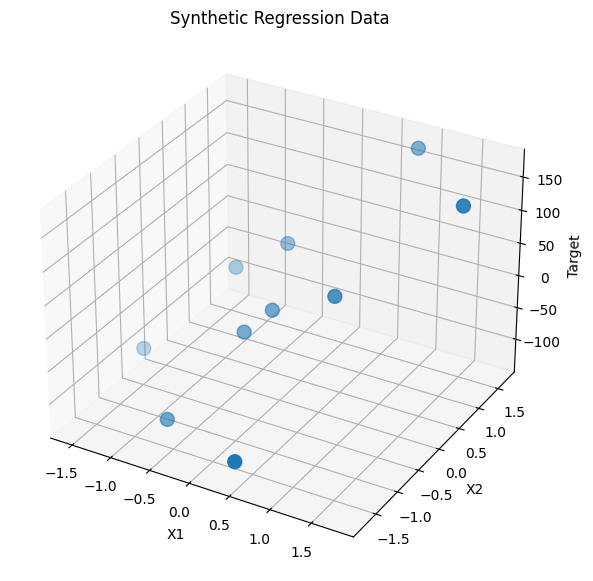

In [11]:

# b) Visualize data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_centered[:, 0], X_centered[:, 1], y_centered, s=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Target')
ax.set_title('Synthetic Regression Data')
plt.show()

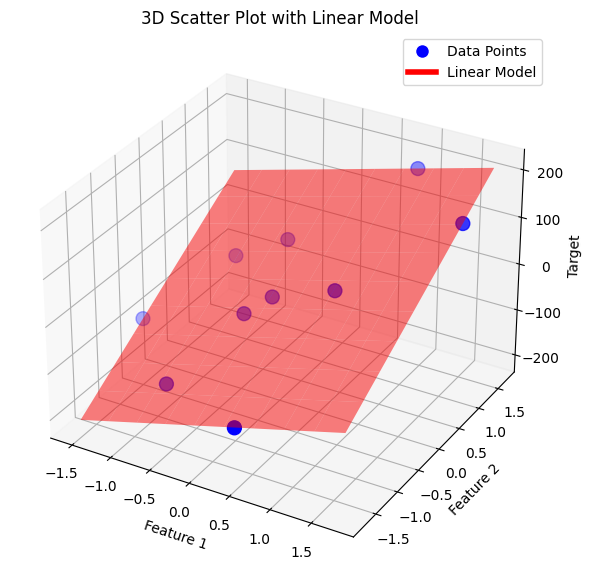

In [38]:
# c) Perform linear regression and visualize
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Fit linear regression model
reg = LinearRegression().fit(X_centered, y_centered)

# Create grid for surface plot
x1_range = np.linspace(X_centered[:, 0].min(), X_centered[:, 0].max(), 10)
x2_range = np.linspace(X_centered[:, 1].min(), X_centered[:, 1].max(), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = reg.predict(np.array([X1.ravel(), X2.ravel()]).T)
Y = Y.reshape(X1.shape)

# Scatter plot of the original data
ax.scatter(X_centered[:, 0], X_centered[:, 1], y_centered, s=100, label='Data Points', color='b')

# Surface plot of the linear model
ax.plot_surface(X1, X2, Y, alpha=0.5, color='r', label='Linear Model')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Scatter Plot with Linear Model')

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points', markerfacecolor='b', markersize=10),
                   Line2D([0], [0], color='r', lw=4, label='Linear Model')]
ax.legend(handles=legend_elements)

plt.show()

In [36]:
# d) Compute the Principal Components using SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
# Project the data onto the principal components
X_pca = U @ np.diag(S)

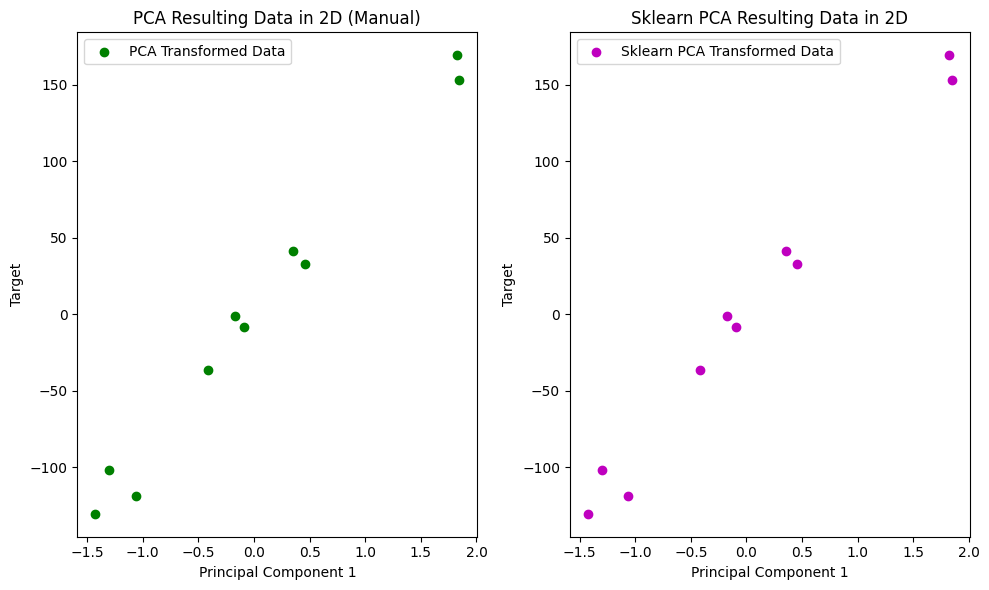

In [35]:
# e) Visualize the resulting data in a 2D scatter plot
# PCA by sklearn
pca = PCA(n_components=2)
X_sklearn_pca = pca.fit_transform(X_centered)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Subplot for manual PCA
axes[0].scatter(X_pca[:, 0], y_centered, color='g', label='PCA Transformed Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Target')
axes[0].set_title('PCA Resulting Data in 2D (Manual)')
axes[0].legend()

# Subplot for sklearn PCA
axes[1].scatter(X_sklearn_pca[:, 0], y_centered, color='m', label='Sklearn PCA Transformed Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Target')
axes[1].set_title('Sklearn PCA Resulting Data in 2D')
axes[1].legend()
plt.tight_layout()
plt.show()